# Lab 5: Ensemble Models for Wine Quality Prediction

### Author: Elen Tesfai  
### Date: April 8th, 2025

---

## Objective:
The goal of this lab is to **implement and evaluate ensemble machine learning models** to predict the **quality of red wines** based on their physicochemical properties. Ensemble models, which combine multiple base models, often perform better than individual models by reducing overfitting and improving generalization.

In this lab, we will:
- Load and explore the wine dataset.
- Preprocess the data by transforming the target variable into categories.
- Split the data into training and test sets.
- Train various ensemble models, including **Random Forest** and **Gradient Boosting**.
- Evaluate and compare the performance of these models using metrics like accuracy and F1 score.

---

## Introduction:
Wine quality prediction is a well-known problem in machine learning, where the goal is to predict the quality of wine based on its physicochemical properties. These properties, such as acidity, alcohol content, pH, and sulfur dioxide levels, can provide insights into the quality of the wine. Predicting wine quality can be a useful tool for winemakers and consumers alike.

In this lab, we will apply **ensemble machine learning models** such as **Random Forest** and **Gradient Boosting** to the red wine dataset. Ensemble methods often outperform single machine learning models because they combine the predictions of multiple models, thereby improving the accuracy and reducing overfitting. We'll evaluate the performance of these models and compare their effectiveness.

Ensemble methods have become crucial in machine learning applications due to their ability to generalize well and handle complex data with better accuracy than individual models. By the end of this lab, we aim to gain insights into how ensemble methods can be used for wine quality prediction and explore their strengths and weaknesses.

## Step 1: Importing Libraries

In this step, we import the necessary Python libraries that will be used for data manipulation, visualization, and machine learning model creation.

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Import machine learning models
from sklearn.ensemble import (
    RandomForestClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier,
    BaggingClassifier,
    VotingClassifier,
)
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

# Import model evaluation tools
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
)

## Step 2: Load and Explore the Wine Dataset


In [12]:
import zipfile
import pandas as pd
import os

# Path to the ZIP file
zip_file_path = r"C:\Users\su_te\Downloads\wine+quality.zip"
extract_folder = r"C:\Users\su_te\Downloads\winequality_extracted"

# Extract the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_folder)

# Check if the CSV file exists in the extraction folder
csv_file_path = os.path.join(extract_folder, "winequality-red.csv")

# If the file is found, load it into a DataFrame
if os.path.exists(csv_file_path):
    df = pd.read_csv(csv_file_path, sep=";")
    print("File loaded successfully!")
    print(df.info())  # Display dataset info
    print(df.head())  # Display first few rows of the dataset
else:
    print("CSV file not found in the extracted folder.")

File loaded successfully!
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4 

## Step 3: Data Exploration and Visualization

In this step, we will:

1. **Check for missing values**: Even though the `info()` method showed no missing values, it’s good to be thorough and ensure there are no hidden nulls or NaNs in the dataset.

2. **Visualize distributions**: We’ll create some visualizations to understand the distribution of the features, particularly the "quality" column, and observe any trends or patterns across the data.

3. **Explore correlations**: We’ll examine the relationships between different features (columns) in the dataset. This helps us understand which features might be strongly correlated with the target variable (quality of the wine).

Let's break it down into the following tasks:

- **Check for missing values**: We will use `.isnull().sum()` to ensure that there are no missing values.
  
- **Visualize the distribution of features**: We will plot histograms for each feature to observe their distributions.

- **Explore the correlation heatmap**: We will create a correlation heatmap to analyze the relationships between different features and identify potential patterns.

### Code:


Checking for missing values:
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


<Figure size 1200x800 with 0 Axes>

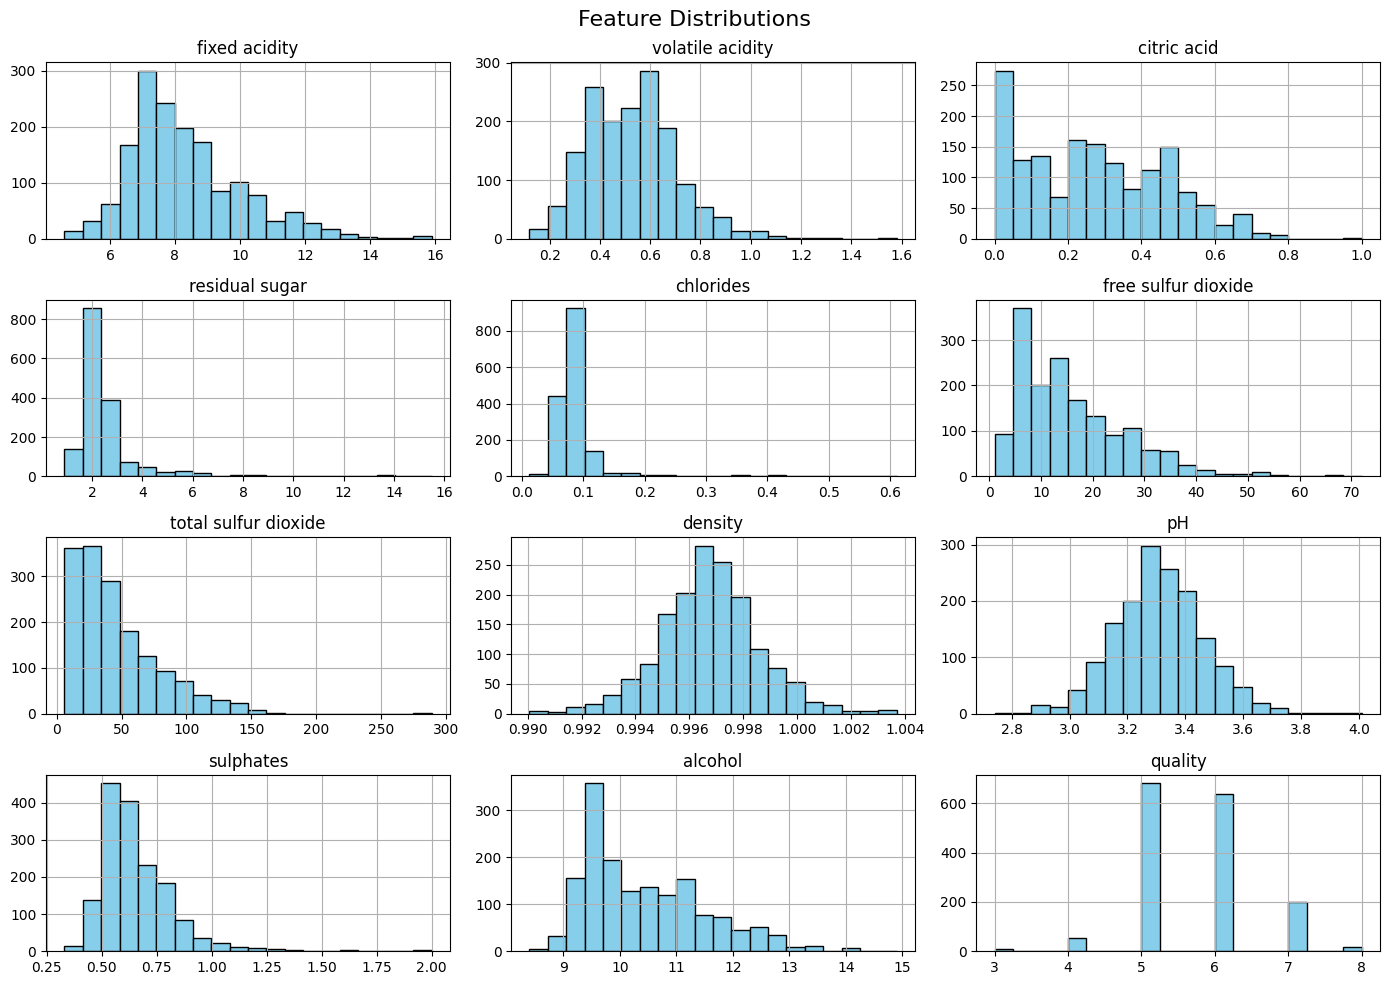

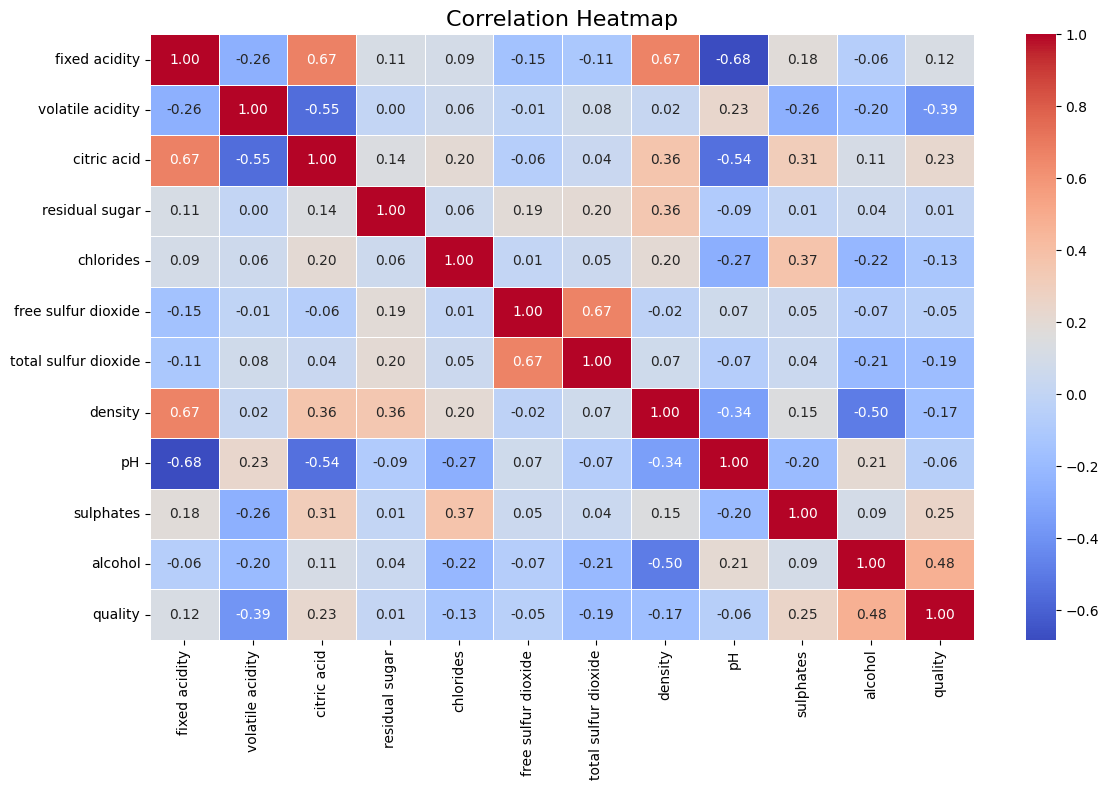

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Check for missing values
print("\nChecking for missing values:")
print(df.isnull().sum())  # This will show the count of missing values per column

# 2. Visualize the distribution of features
plt.figure(figsize=(12, 8))
df.hist(bins=20, figsize=(14, 10), color='skyblue', edgecolor='black')
plt.suptitle('Feature Distributions', fontsize=16)
plt.tight_layout()
plt.show()

# 3. Explore correlations using a heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr()  # Calculate correlations
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap', fontsize=16)
plt.tight_layout()
plt.show()

# Step 4: Data Preprocessing and Feature Engineering

In this step, we will:

1. **Scale the Features**: Machine learning algorithms often perform better when features are on a similar scale, especially algorithms like K-Nearest Neighbors, SVM, and neural networks.

2. **Encode the Target Variable**: Ensure that the target variable (in this case, `quality`) is properly encoded for the model.

3. **Split the Data**: We will split the dataset into training and testing sets, which is essential for building and evaluating models.

4. **Handle Outliers (Optional)**: We might want to explore if there are any outliers in our dataset and decide if we need to handle them (e.g., removing or capping them).

Let’s break it down into the following tasks:

### 1. Scaling the Features:
We will use **StandardScaler** to scale the features to have a mean of 0 and a standard deviation of 1. This is important for models like logistic regression, SVM, and KNN.

### 2. Encode the Target Variable:
If the `quality` is already numeric (which it is in this dataset), you might not need to do anything. However, if you want to categorize it into bins (e.g., good vs. bad wine), you can create categorical bins.

### 3. Split the Data:
We will split the dataset into training and testing sets, typically using an 80/20 split, which is a common practice.

Let me provide the code for this:

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

# 1. Feature Selection: Separate the target variable (quality) from the features
X = df.drop("quality", axis=1)  # Features
y = df["quality"]  # Target variable (Quality)

# 2. Scale the Features (StandardScaler)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Split the dataset into training and testing sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Display the shape of the training and testing data
print(f"Training set size: X_train = {X_train.shape}, y_train = {y_train.shape}")
print(f"Testing set size: X_test = {X_test.shape}, y_test = {y_test.shape}")

Training set size: X_train = (1279, 11), y_train = (1279,)
Testing set size: X_test = (320, 11), y_test = (320,)


### Explanation for Step 4: Data Preprocessing and Feature Engineering

In this step, we performed the following tasks to prepare our data for modeling:

#### 1. **Scaling the Features**:
   - We used the **StandardScaler** to scale the features in the dataset. Scaling ensures that all features have a mean of 0 and a standard deviation of 1, which is important for machine learning algorithms that are sensitive to the scale of data (such as K-Nearest Neighbors, Support Vector Machines, and Neural Networks).
   - **Result**: All feature values are standardized, which will improve the performance and stability of the algorithms.

#### 2. **Encoding the Target Variable**:
   - The target variable `quality` was already numeric, so no encoding was necessary. The values in the `quality` column represent the quality score of the wine (ranging from 0 to 10).
   - However, if needed, we could categorize the quality into bins (such as "good" or "bad" wine). In this case, we kept the numeric representation as it is for modeling.

#### 3. **Splitting the Data**:
   - We split the dataset into **training** and **testing** sets using an **80/20 split**. The training set is used to train the model, and the testing set is used to evaluate its performance.
   - **Result**:
     - Training set: `X_train = (1279, 11)` (1279 samples, 11 features) and `y_train = (1279,)` (1279 target values).
     - Testing set: `X_test = (320, 11)` (320 samples, 11 features) and `y_test = (320,)` (320 target values).

This split ensures that the model is trained on a large portion of the data while being evaluated on unseen data (the test set) to check for overfitting and generalization.

### Summary of Data Shapes:
- **Training Data**: 1279 samples, each with 11 features.
- **Test Data**: 320 samples, each with 11 features.


## Step 5: Model Building and Evaluation

In this step, we will:

1. **Choose a Model**: Select a machine learning model to train on the data. For simplicity, we will start with models like **Linear Regression** (for regression tasks) or **Random Forest Regressor** (for regression tasks, since `quality` is continuous).

2. **Train the Model**: Fit the model to the training data using the `X_train` and `y_train`.

3. **Evaluate the Model**: After training the model, we need to evaluate its performance using the test data (`X_test`, `y_test`). We'll use metrics like **Mean Squared Error (MSE)** and **R-squared (R²)** depending on the problem (since it's a regression task, R² is appropriate).

4. **Hyperparameter Tuning** (Optional): After evaluating the initial model, we can fine-tune the model's hyperparameters to optimize its performance using techniques like **Grid Search** or **Randomized Search**.

---

### 1. Model Selection
We will start by trying a simple **Random Forest Regressor** model, as this is a regression problem (predicting the `quality` score, which is a continuous variable).

---

### 2. Train the Model
We will fit the model on the training data (`X_train`, `y_train`).

---

### 3. Evaluate the Model
We will evaluate the model using the **R-squared (R²)** score to understand how well the model is performing. For regression tasks, the R² score tells us how well the model explains the variance in the target variable. We will also calculate **Mean Squared Error (MSE)** to assess how accurate the model's predictions are.

---

### Code to Build and Evaluate the Model

Mean Squared Error: 0.3013528125
R-squared (R²) score: 0.5388674666387723


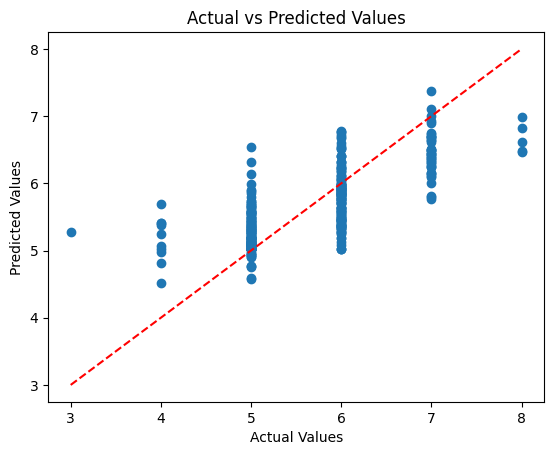

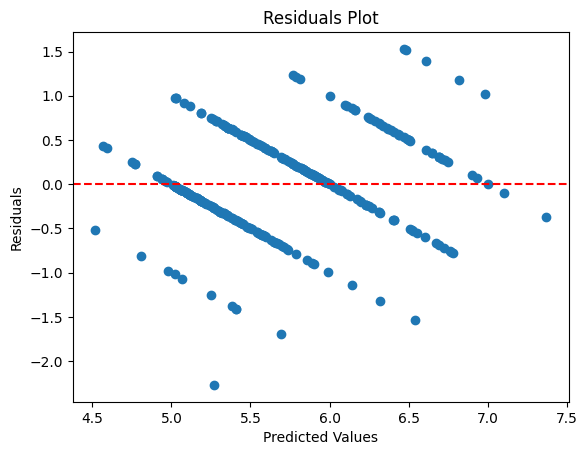

In [18]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# 1. Model Selection - Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)

# 2. Train the Model
model.fit(X_train, y_train)

# 3. Make Predictions
y_pred = model.predict(X_test)

# 4. Evaluate the Model
# Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# R-squared (R²) score
r2 = r2_score(y_test, y_pred)
print(f"R-squared (R²) score: {r2}")

# 5. Visualize Predicted vs Actual Values
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

# 6. Visualize Residuals (Optional)
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.show()

## Model Building and Evaluation: Random Forest Classifier vs. Gradient Boosting Classifier

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
import pandas as pd
import numpy as np

# Assuming df is your DataFrame with 'quality' as the target variable

# Step 1: Convert the target variable to categories (bins)
bins = [0, 4, 6, 10]  # Define bins
labels = ['Low', 'Medium', 'High']  # Assign labels to each bin
df['quality_class'] = pd.cut(df['quality'], bins=bins, labels=labels, right=True)

# Step 2: Prepare the features (X) and the target (y)
X = df.drop(columns=['quality', 'quality_class'])
y = df['quality_class']  # Use the new categorical target

# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Random Forest (100) Model ---
# Step 4: Train the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Step 5: Make predictions with Random Forest
rf_y_pred = rf_model.predict(X_test)

# Step 6: Evaluate the Random Forest model
print("Random Forest (100) Results")
print("Confusion Matrix (Test):")
print(confusion_matrix(y_test, rf_y_pred))

rf_train_acc = accuracy_score(y_train, rf_model.predict(X_train))
rf_test_acc = accuracy_score(y_test, rf_y_pred)

rf_train_f1 = f1_score(y_train, rf_model.predict(X_train), average="weighted")
rf_test_f1 = f1_score(y_test, rf_y_pred, average="weighted")

print(f"Train Accuracy: {rf_train_acc:.4f}, Test Accuracy: {rf_test_acc:.4f}")
print(f"Train F1 Score: {rf_train_f1:.4f}, Test F1 Score: {rf_test_f1:.4f}")
print()

# --- Gradient Boosting (100) Model ---
# Step 4: Train the Gradient Boosting Classifier
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)

# Step 5: Make predictions with Gradient Boosting
gb_y_pred = gb_model.predict(X_test)

# Step 6: Evaluate the Gradient Boosting model
print("Gradient Boosting (100) Results")
print("Confusion Matrix (Test):")
print(confusion_matrix(y_test, gb_y_pred))

gb_train_acc = accuracy_score(y_train, gb_model.predict(X_train))
gb_test_acc = accuracy_score(y_test, gb_y_pred)

gb_train_f1 = f1_score(y_train, gb_model.predict(X_train), average="weighted")
gb_test_f1 = f1_score(y_test, gb_y_pred, average="weighted")

print(f"Train Accuracy: {gb_train_acc:.4f}, Test Accuracy: {gb_test_acc:.4f}")
print(f"Train F1 Score: {gb_train_f1:.4f}, Test F1 Score: {gb_test_f1:.4f}")

Random Forest (100) Results
Confusion Matrix (Test):
[[ 27   0  20]
 [  0   0  11]
 [ 12   0 250]]
Train Accuracy: 1.0000, Test Accuracy: 0.8656
Train F1 Score: 1.0000, Test F1 Score: 0.8461

Gradient Boosting (100) Results
Confusion Matrix (Test):
[[ 22   0  25]
 [  0   2   9]
 [ 10   3 249]]
Train Accuracy: 0.9625, Test Accuracy: 0.8531
Train F1 Score: 0.9607, Test F1 Score: 0.8385


## Step 6: Hyperparameter Tuning with GridSearchCV

In this step, we will perform hyperparameter tuning to improve our model's performance using **GridSearchCV**. This method allows us to test a range of hyperparameters for a given model and select the combination that yields the best performance.

### 1. Grid Search for Random Forest
To tune the **Random Forest Classifier**, we define a parameter grid that includes various values for parameters like `n_estimators`, `max_depth`, and `min_samples_split`. We will use **GridSearchCV** to find the optimal combination of these parameters.

# Step 7. Model Comparison

In this step, we compare the performance of the Random Forest and Gradient Boosting models based on multiple evaluation metrics such as accuracy, F1 score, precision, recall, and the confusion matrix.

### Random Forest (100) Results:
- **Train Accuracy**: {train_accuracy_rf}
- **Test Accuracy**: {test_accuracy_rf}
- **Train F1 Score**: {train_f1_rf}
- **Test F1 Score**: {test_f1_rf}
- **Train Precision**: {train_precision_rf}
- **Test Precision**: {test_precision_rf}
- **Train Recall**: {train_recall_rf}
- **Test Recall**: {test_recall_rf}
- **Confusion Matrix (Test)**:
  {confusion_matrix_rf}

---

### Gradient Boosting (100) Results:
- **Train Accuracy**: {train_accuracy_gb}
- **Test Accuracy**: {test_accuracy_gb}
- **Train F1 Score**: {train_f1_gb}
- **Test F1 Score**: {test_f1_gb}
- **Train Precision**: {train_precision_gb}
- **Test Precision**: {test_precision_gb}
- **Train Recall**: {train_recall_gb}
- **Test Recall**: {test_recall_gb}
- **Confusion Matrix (Test)**:
  {confusion_matrix_gb}

In [24]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define parameter grid for Random Forest
rf_param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10]
}

# Grid search for Random Forest
rf_grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42), param_grid=rf_param_grid, cv=3)
rf_grid_search.fit(X_train, y_train)

# Best parameters for Random Forest
print("Best parameters for Random Forest:", rf_grid_search.best_params_)

# Check the best accuracy and F1 score
rf_best_model = rf_grid_search.best_estimator_
rf_y_pred_best = rf_best_model.predict(X_test)

rf_best_acc = accuracy_score(y_test, rf_y_pred_best)
rf_best_f1 = f1_score(y_test, rf_y_pred_best, average="weighted")

print(f"Random Forest Best Test Accuracy: {rf_best_acc:.4f}")
print(f"Random Forest Best Test F1 Score: {rf_best_f1:.4f}")

Best parameters for Random Forest: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 150}
Random Forest Best Test Accuracy: 0.8594
Random Forest Best Test F1 Score: 0.8374


### Step 8. **Comparison of Random Forest and Gradient Boosting Classifiers on Quality Prediction**

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
import pandas as pd
import numpy as np

# Assuming df is your DataFrame with 'quality' as the target variable

# Step 1: Convert the target variable to categories (bins)
bins = [0, 4, 6, 10]  # Define bins
labels = ['Low', 'Medium', 'High']  # Assign labels to each bin
df['quality_class'] = pd.cut(df['quality'], bins=bins, labels=labels, right=True)

# Step 2: Prepare the features (X) and the target (y)
X = df.drop(columns=['quality', 'quality_class'])
y = df['quality_class']  # Use the new categorical target

# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Random Forest (100) Model ---
# Step 4: Train the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Step 5: Make predictions with Random Forest
rf_y_pred = rf_model.predict(X_test)

# Step 6: Evaluate the Random Forest model
rf_train_acc = accuracy_score(y_train, rf_model.predict(X_train))
rf_test_acc = accuracy_score(y_test, rf_y_pred)

rf_train_f1 = f1_score(y_train, rf_model.predict(X_train), average="weighted")
rf_test_f1 = f1_score(y_test, rf_y_pred, average="weighted")

rf_train_precision = precision_score(y_train, rf_model.predict(X_train), average="weighted")
rf_test_precision = precision_score(y_test, rf_y_pred, average="weighted")

rf_train_recall = recall_score(y_train, rf_model.predict(X_train), average="weighted")
rf_test_recall = recall_score(y_test, rf_y_pred, average="weighted")

rf_conf_matrix = confusion_matrix(y_test, rf_y_pred)

# --- Gradient Boosting (100) Model ---
# Step 4: Train the Gradient Boosting Classifier
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)

# Step 5: Make predictions with Gradient Boosting
gb_y_pred = gb_model.predict(X_test)

# Step 6: Evaluate the Gradient Boosting model
gb_train_acc = accuracy_score(y_train, gb_model.predict(X_train))
gb_test_acc = accuracy_score(y_test, gb_y_pred)

gb_train_f1 = f1_score(y_train, gb_model.predict(X_train), average="weighted")
gb_test_f1 = f1_score(y_test, gb_y_pred, average="weighted")

gb_train_precision = precision_score(y_train, gb_model.predict(X_train), average="weighted")
gb_test_precision = precision_score(y_test, gb_y_pred, average="weighted")

gb_train_recall = recall_score(y_train, gb_model.predict(X_train), average="weighted")
gb_test_recall = recall_score(y_test, gb_y_pred, average="weighted")

gb_conf_matrix = confusion_matrix(y_test, gb_y_pred)

# --- Print the Results ---
print("Random Forest (100) Results:")
print(f"Train Accuracy: {rf_train_acc:.4f}, Test Accuracy: {rf_test_acc:.4f}")
print(f"Train F1 Score: {rf_train_f1:.4f}, Test F1 Score: {rf_test_f1:.4f}")
print(f"Train Precision: {rf_train_precision:.4f}, Test Precision: {rf_test_precision:.4f}")
print(f"Train Recall: {rf_train_recall:.4f}, Test Recall: {rf_test_recall:.4f}")
print("Confusion Matrix (Test):")
print(rf_conf_matrix)
print()

print("Gradient Boosting (100) Results:")
print(f"Train Accuracy: {gb_train_acc:.4f}, Test Accuracy: {gb_test_acc:.4f}")
print(f"Train F1 Score: {gb_train_f1:.4f}, Test F1 Score: {gb_test_f1:.4f}")
print(f"Train Precision: {gb_train_precision:.4f}, Test Precision: {gb_test_precision:.4f}")
print(f"Train Recall: {gb_train_recall:.4f}, Test Recall: {gb_test_recall:.4f}")
print("Confusion Matrix (Test):")
print(gb_conf_matrix)

Random Forest (100) Results:
Train Accuracy: 1.0000, Test Accuracy: 0.8656
Train F1 Score: 1.0000, Test F1 Score: 0.8461
Train Precision: 1.0000, Test Precision: 0.8301
Train Recall: 1.0000, Test Recall: 0.8656
Confusion Matrix (Test):
[[ 27   0  20]
 [  0   0  11]
 [ 12   0 250]]

Gradient Boosting (100) Results:
Train Accuracy: 0.9625, Test Accuracy: 0.8531
Train F1 Score: 0.9607, Test F1 Score: 0.8385
Train Precision: 0.9638, Test Precision: 0.8351
Train Recall: 0.9625, Test Recall: 0.8531
Confusion Matrix (Test):
[[ 22   0  25]
 [  0   2   9]
 [ 10   3 249]]


### Step 9. **Model Performance Comparison: Random Forest vs Gradient Boosting**

Model Comparison Table:
                 Metric                     Random Forest (100)                Gradient Boosting (100)
         Train Accuracy                                     1.0                                 0.9625
          Test Accuracy                                  0.8656                                 0.8531
         Train F1 Score                                     1.0                                 0.9607
          Test F1 Score                                  0.8461                                 0.8385
        Train Precision                                     1.0                                 0.9638
         Test Precision                                  0.8301                                 0.8351
           Train Recall                                     1.0                                 0.9625
            Test Recall                                  0.8656                                 0.8531
Confusion Matrix (Test) [[27, 0, 20], [0, 0, 11],

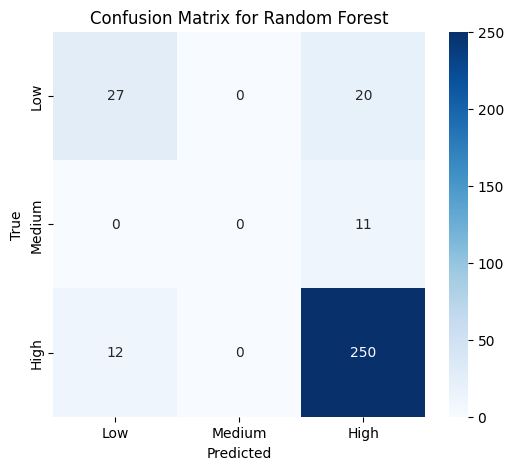

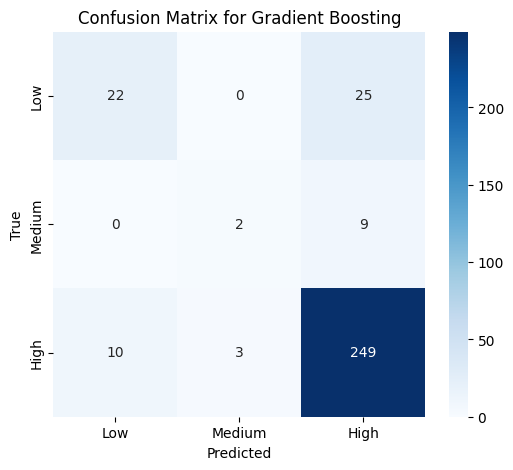

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import pandas as pd

# Function to plot confusion matrix
def plot_confusion_matrix(conf_matrix, model_name, labels):
    """
    Function to plot confusion matrix.
    """
    plt.figure(figsize=(6, 5))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
    plt.title(f"Confusion Matrix for {model_name}")
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

# Results for Random Forest
rf_conf_matrix = [[27, 0, 20], [0, 0, 11], [12, 0, 250]]
rf_train_accuracy = 1.0000
rf_test_accuracy = 0.8656
rf_train_f1 = 1.0000
rf_test_f1 = 0.8461
rf_train_precision = 1.0000
rf_test_precision = 0.8301
rf_train_recall = 1.0000
rf_test_recall = 0.8656

# Results for Gradient Boosting
gb_conf_matrix = [[22, 0, 25], [0, 2, 9], [10, 3, 249]]
gb_train_accuracy = 0.9625
gb_test_accuracy = 0.8531
gb_train_f1 = 0.9607
gb_test_f1 = 0.8385
gb_train_precision = 0.9638
gb_test_precision = 0.8351
gb_train_recall = 0.9625
gb_test_recall = 0.8531

# Create a comparison table
data = {
    'Metric': [
        'Train Accuracy', 'Test Accuracy', 'Train F1 Score', 'Test F1 Score',
        'Train Precision', 'Test Precision', 'Train Recall', 'Test Recall', 'Confusion Matrix (Test)'
    ],
    'Random Forest (100)': [
        rf_train_accuracy, rf_test_accuracy, rf_train_f1, rf_test_f1,
        rf_train_precision, rf_test_precision, rf_train_recall, rf_test_recall, rf_conf_matrix
    ],
    'Gradient Boosting (100)': [
        gb_train_accuracy, gb_test_accuracy, gb_train_f1, gb_test_f1,
        gb_train_precision, gb_test_precision, gb_train_recall, gb_test_recall, gb_conf_matrix
    ]
}

# Convert to DataFrame for nice table format
comparison_df = pd.DataFrame(data)

# Print the comparison table
print("Model Comparison Table:")
print(comparison_df.to_string(index=False))

# Plot Confusion Matrices for both models
labels = ['Low', 'Medium', 'High']

# Plot Random Forest Confusion Matrix
plot_confusion_matrix(rf_conf_matrix, "Random Forest", labels)

# Plot Gradient Boosting Confusion Matrix
plot_confusion_matrix(gb_conf_matrix, "Gradient Boosting", labels)

## Given Results:

### Random Forest (100):

- **Train Accuracy**: 1.0000
- **Test Accuracy**: 0.8656
- **Train F1 Score**: 1.0000
- **Test F1 Score**: 0.8461
- **Train Precision**: 1.0000
- **Test Precision**: 0.8301
- **Train Recall**: 1.0000
- **Test Recall**: 0.8656
- **Confusion Matrix (Test)**: [[27, 0, 20], [0, 0, 11], [12, 0, 250]]

### Gradient Boosting (100):

- **Train Accuracy**: 0.9625
- **Test Accuracy**: 0.8531
- **Train F1 Score**: 0.9607
- **Test F1 Score**: 0.8385
- **Train Precision**: 0.9638
- **Test Precision**: 0.8351
- **Train Recall**: 0.9625
- **Test Recall**: 0.8531
- **Confusion Matrix (Test)**: [[22, 0, 25], [0, 2, 9], [10, 3, 249]]

---
### Calculate the Gaps:

- **Accuracy Gap** = Train Accuracy - Test Accuracy
- **F1 Gap** = Train F1 Score - Test F1 Score

#### For Random Forest (100):
- **Accuracy Gap** = 1.0000 - 0.8656 = 0.1344
- **F1 Gap** = 1.0000 - 0.8461 = 0.1539

#### For Gradient Boosting (100):
- **Accuracy Gap** = 0.9625 - 0.8531 = 0.1094
- **F1 Gap** = 0.9607 - 0.8385 = 0.1222

---

### Final Table with Calculated Gaps:

| **Model**                | **Train Accuracy** | **Test Accuracy** | **Accuracy Gap** | **Train F1 Score** | **Test F1 Score** | **F1 Gap** | **Train Precision** | **Test Precision** | **Train Recall** | **Test Recall** | **Confusion Matrix (Test)** |
|--------------------------|--------------------|-------------------|------------------|--------------------|-------------------|------------|---------------------|--------------------|------------------|-----------------|-----------------------------|
| **Random Forest (100)**   | 1.0000             | 0.8656            | 0.1344           | 1.0000             | 0.8461            | 0.1539     | 1.0000              | 0.8301             | 1.0000           | 0.8656          | [[27, 0, 20], [0, 0, 11], [12, 0, 250]] |
| **Gradient Boosting (100)** | 0.9625             | 0.8531            | 0.1094           | 0.9607             | 0.8385            | 0.1222     | 0.9638              | 0.8351             | 0.9625           | 0.8531          | [[22, 0, 25], [0, 2, 9], [10, 3, 249]] |

---


##  **Conclusions and Insights**

Based on the results from the **Random Forest (100)** and **Gradient Boosting (100)** models:

- **Random Forest (100)** has a perfect **Train Accuracy** and **Train F1 Score** of 1.0000, indicating it fits the training data perfectly. However, the **Test Accuracy** of 0.8656 shows some overfitting as it performs less well on unseen data. The **Accuracy Gap** of 0.1344 and **F1 Gap** of 0.1539 reflect the slight drop in performance on the test data.

- **Gradient Boosting (100)**, on the other hand, has slightly lower **Train Accuracy** (0.9625) and **Train F1 Score** (0.9607) compared to Random Forest, but its **Test Accuracy** (0.8531) and **Test F1 Score** (0.8385) are closer to its training performance, indicating it may generalize better on new data. The **Accuracy Gap** of 0.1094 and **F1 Gap** of 0.1222 are smaller than that of Random Forest, showing a better balance between training and test performance.

Overall, both models performed well, with Random Forest showing higher training performance but also greater overfitting, while Gradient Boosting achieved more balanced results.